In [79]:
import pandas as pd
import numpy as np
import plotly.express as ex
import plotly.graph_objects as go
from scipy.stats import spearmanr

from sklearn.cluster import (
    KMeans,
    DBSCAN,
    OPTICS,
    Birch,
    MeanShift,
    AffinityPropagation,
    AgglomerativeClustering,
    SpectralClustering,
)

from kakarake.parallel_coords import GaussianMixtureclustering


from sklearn import manifold
from collections import OrderedDict
from functools import partial

from time import sleep
from sklearn.preprocessing import MinMaxScaler
from tsp_solver.greedy import solve_tsp
import seaborn as sns
from plotly.tools import mpl_to_plotly
from kakarake.parallel_coordinates_bands import auto_par_coords

In [29]:
data = pd.read_csv("../data/c432-88.csv")

In [30]:
data

,f1,f2,f3,f4,f5,f6,f7,f8,f9
0,-299.500,299.500,149.750,149.750,299.500,299.500,299.500,-299.500,299.500
1,-70.429,528.571,-117.500,340.643,70.429,681.286,223.143,-70.429,528.571
2,-102.813,102.812,543.125,-46.938,496.188,102.812,692.875,-496.188,-93.875
3,-101.750,101.750,347.500,149.750,695.000,299.500,695.000,96.000,101.750
4,11.774,514.871,-261.355,393.161,-107.677,722.387,99.839,11.774,546.839
...,...,...,...,...,...,...,...,...,...
83,408.789,174.899,48.156,277.569,150.394,305.257,178.514,510.596,-75.844
84,118.509,-276.991,379.589,-161.857,511.330,-62.634,395.500,167.634,-478.812
85,436.616,41.116,159.464,161.980,222.637,200.371,318.719,442.099,-197.854
86,138.399,-257.101,355.721,-122.077,523.264,-26.832,395.500,243.216,-450.966


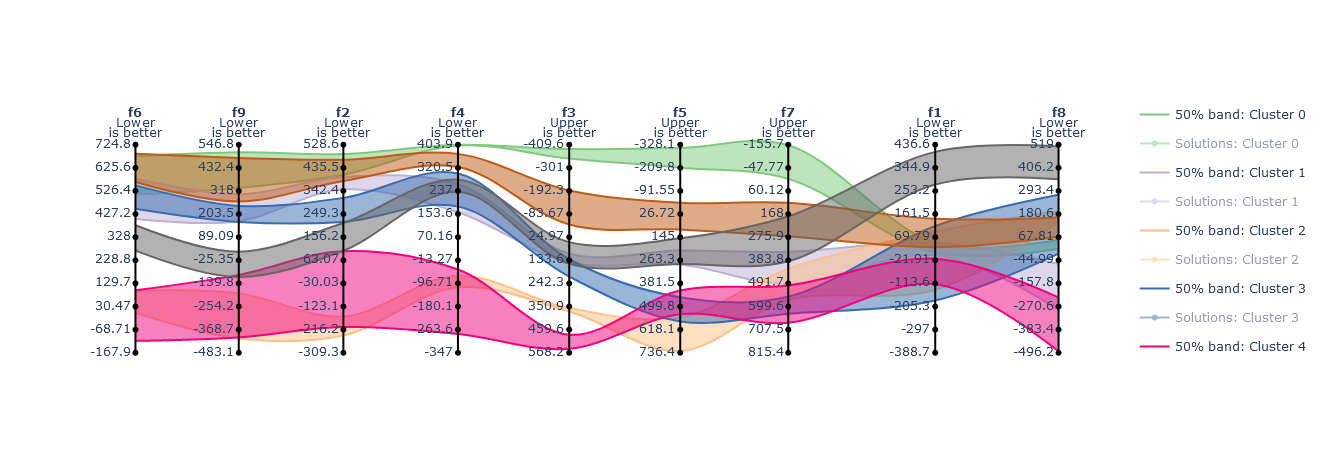

In [81]:
auto_par_coords(data, bands=True)

In [86]:
corr = spearmanr(data).correlation

In [87]:
distances = -np.abs(corr)
obj_order = solve_tsp(distances)
order = np.asarray(list((zip(obj_order[:-1], obj_order[1:]))))

In [88]:
obj_order

[5, 8, 1, 3, 2, 4, 6, 0, 7]

In [89]:
corr = pd.DataFrame(corr, index=data.columns, columns=data.columns)

In [92]:
corr

,f6,f9,f2,f4,f3,f5,f7,f1,f8
f8,0.063536,-0.097385,-0.072552,0.389135,-0.305622,-0.135082,-0.334364,0.739268,1.000000
f1,0.016785,-0.131508,0.034868,0.373339,-0.317988,-0.467058,-0.586056,1.000000,0.739268
f7,-0.340436,-0.362946,-0.533674,-0.656722,0.745117,0.890027,1.000000,-0.586056,-0.334364
f5,-0.568005,-0.591180,-0.732585,-0.722293,0.855968,1.000000,0.890027,-0.467058,-0.135082
f3,-0.795952,-0.786541,-0.812253,-0.853275,1.000000,0.855968,0.745117,-0.317988,-0.305622
f4,0.769084,0.726518,0.818387,1.000000,-0.853275,-0.722293,-0.656722,0.373339,0.389135
f2,0.905361,0.932538,1.000000,0.818387,-0.812253,-0.732585,-0.533674,0.034868,-0.072552
f9,0.949690,1.000000,0.932538,0.726518,-0.786541,-0.591180,-0.362946,-0.131508,-0.097385
f6,1.000000,0.949690,0.905361,0.769084,-0.795952,-0.568005,-0.340436,0.016785,0.063536


In [18]:
data.columns[obj_order]

Index(['f6', 'f9', 'f2', 'f4', 'f3', 'f5', 'f7', 'f1', 'f8'], dtype='object')

<AxesSubplot:>

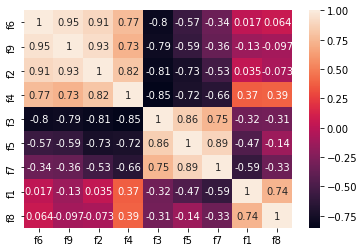

In [76]:
sns.heatmap(corr[data.columns[obj_order]].loc[data.columns[obj_order]], annot=True)

In [36]:
import plotly.figure_factory as ff

In [91]:
corr = corr[data.columns[obj_order]].loc[data.columns[obj_order[::-1]]]

In [38]:
obj_o

,f6,f9,f2,f4,f3,f5,f7,f1,f8
f6,1.000000,0.949690,0.905361,0.769084,-0.795952,-0.568005,-0.340436,0.016785,0.063536
f9,0.949690,1.000000,0.932538,0.726518,-0.786541,-0.591180,-0.362946,-0.131508,-0.097385
f2,0.905361,0.932538,1.000000,0.818387,-0.812253,-0.732585,-0.533674,0.034868,-0.072552
f4,0.769084,0.726518,0.818387,1.000000,-0.853275,-0.722293,-0.656722,0.373339,0.389135
f3,-0.795952,-0.786541,-0.812253,-0.853275,1.000000,0.855968,0.745117,-0.317988,-0.305622
f5,-0.568005,-0.591180,-0.732585,-0.722293,0.855968,1.000000,0.890027,-0.467058,-0.135082
f7,-0.340436,-0.362946,-0.533674,-0.656722,0.745117,0.890027,1.000000,-0.586056,-0.334364
f1,0.016785,-0.131508,0.034868,0.373339,-0.317988,-0.467058,-0.586056,1.000000,0.739268
f8,0.063536,-0.097385,-0.072552,0.389135,-0.305622,-0.135082,-0.334364,0.739268,1.000000


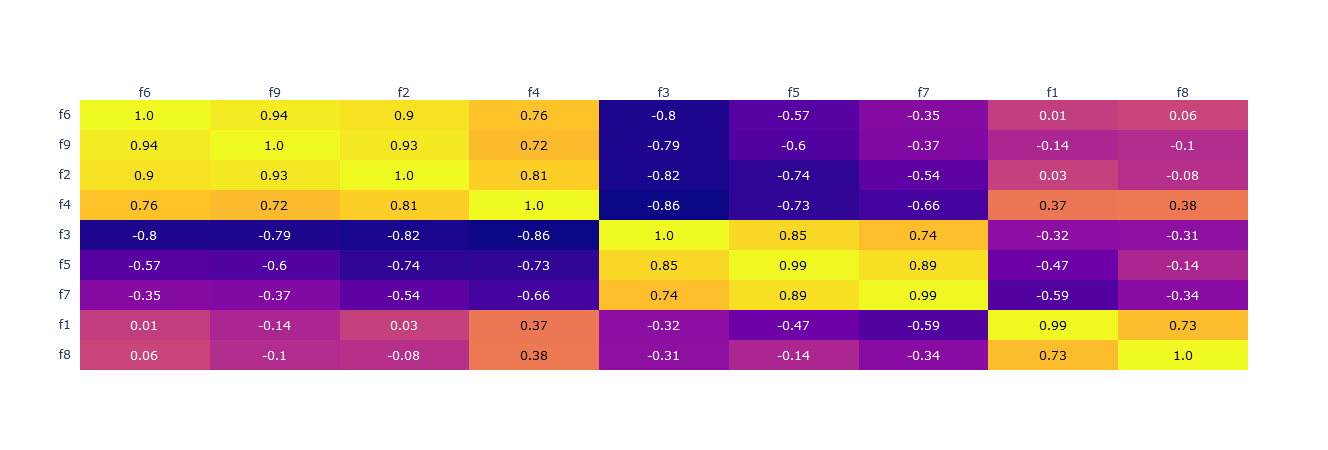

In [93]:
corr = np.floor(corr*100)/100
ff.create_annotated_heatmap(corr.values, x=list(corr.columns), y=list(corr.index), annotation_text=corr.astype(str).values)

In [59]:
np.floor(corr*100)/100

,f6,f9,f2,f4,f3,f5,f7,f1,f8
f6,1.00,0.94,0.90,0.76,-0.80,-0.57,-0.35,0.01,0.06
f9,0.94,1.00,0.93,0.72,-0.79,-0.60,-0.37,-0.14,-0.10
f2,0.90,0.93,1.00,0.81,-0.82,-0.74,-0.54,0.03,-0.08
f4,0.76,0.72,0.81,1.00,-0.86,-0.73,-0.66,0.37,0.38
f3,-0.80,-0.79,-0.82,-0.86,1.00,0.85,0.74,-0.32,-0.31
f5,-0.57,-0.60,-0.74,-0.73,0.85,0.99,0.89,-0.47,-0.14
f7,-0.35,-0.37,-0.54,-0.66,0.74,0.89,0.99,-0.59,-0.34
f1,0.01,-0.14,0.03,0.37,-0.32,-0.47,-0.59,0.99,0.73
f8,0.06,-0.10,-0.08,0.38,-0.31,-0.14,-0.34,0.73,1.00


In [63]:
list(corr.index)[::-1]

['f8', 'f1', 'f7', 'f5', 'f3', 'f4', 'f2', 'f9', 'f6']